# Libraries required for Employee turnover prediction :-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, recall_score, precision_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Dataset :-

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

# Data Preprocessing and Cleaning :-

### Checking null or nan values by .isnull() method

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Checking duplicates values using .duplicated() method

In [9]:
df.duplicated().sum()

0

### Getting summary or information about dataset using .info() method

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### print only columns of dataset using .columns method

In [13]:
print( df.columns.to_list())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# Exploratory Data Analysis and Data Transformation :-

### Ploting data on hist plot to get structure (normal or not_normal) the plot having a bell shape curve is normalzied data and other not normal data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

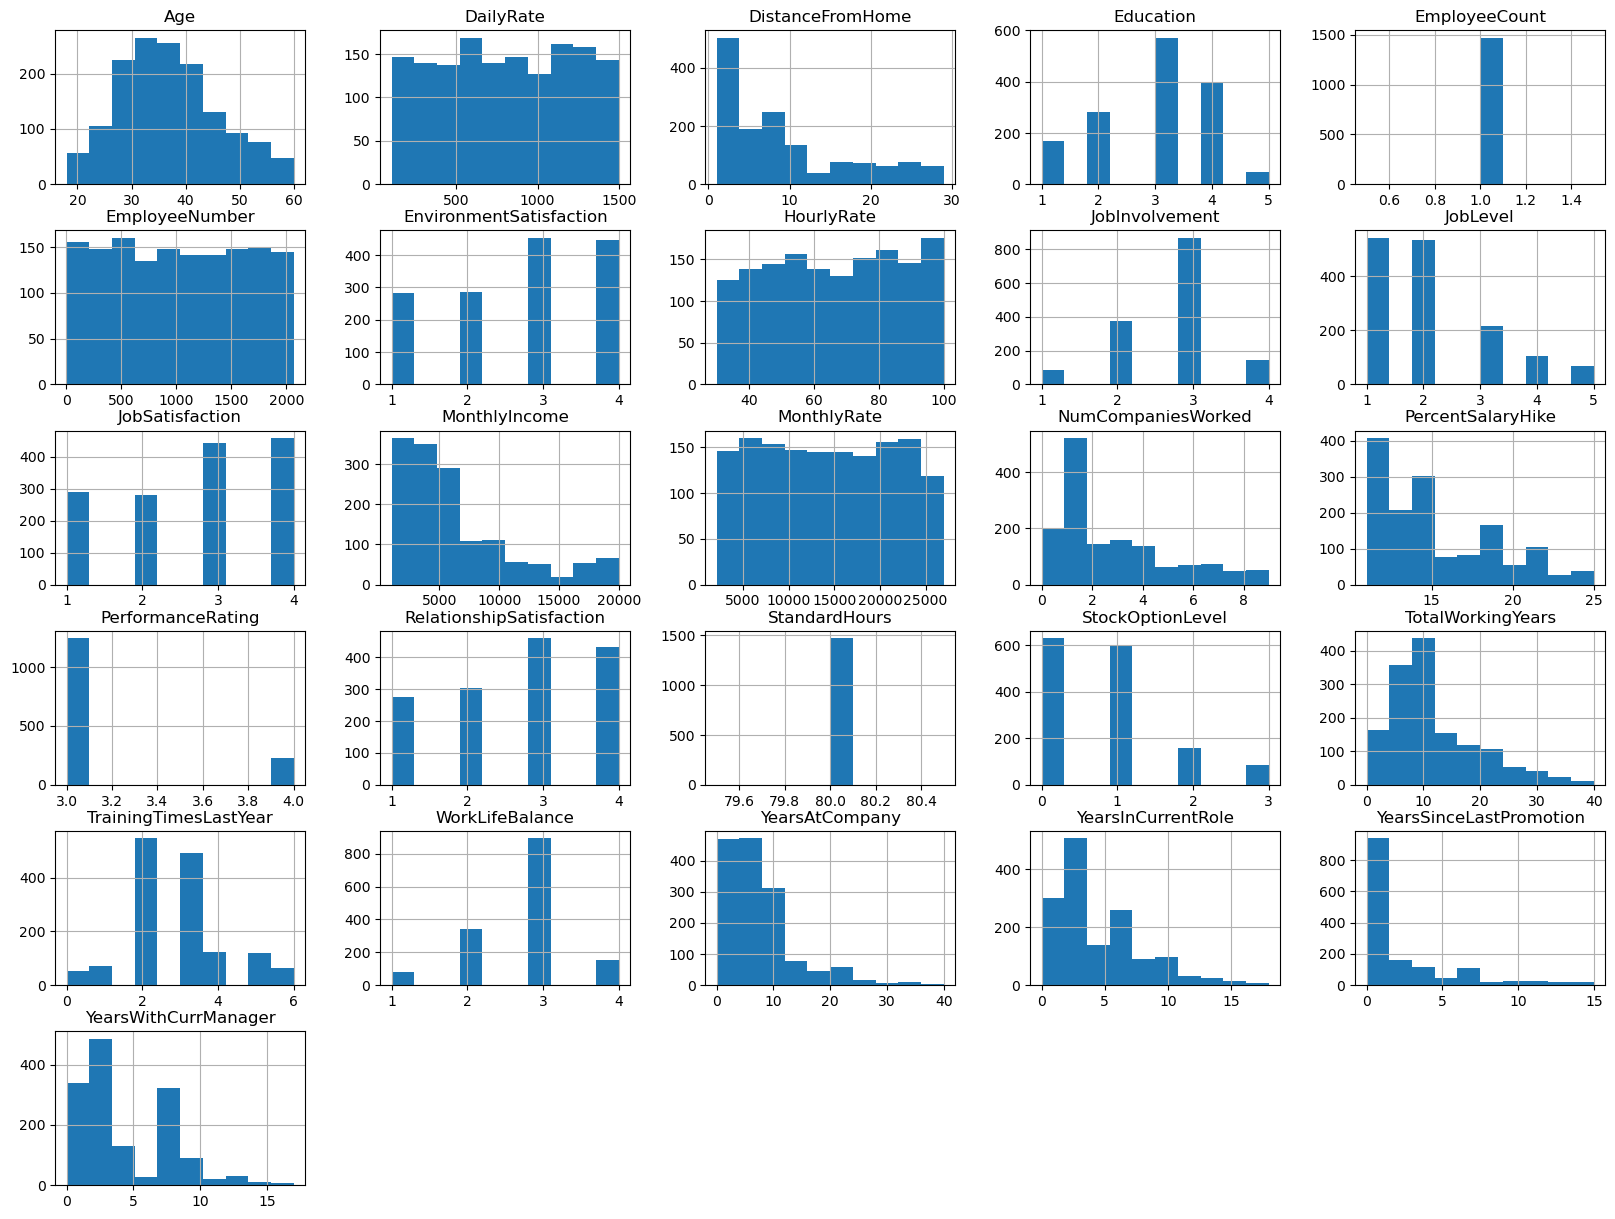

In [16]:
df.hist(figsize=(20,15))

## Converting datatypes by Using :- 
### Label Encoding :- Label Encoding transform categorical into numeric type 

In [18]:
LE = LabelEncoder()

df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['EducationField'] = LE.fit_transform(df['EducationField'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])

### Using for loop to assign values to object type columns 

In [20]:
num_attrition = []
for x in df['Attrition']:
    if(x == 'Yes'):
        num_attrition.append(1)
    else:
        num_attrition.append(0)
df['Attrition'] = num_attrition

In [21]:
num_gender = []
for x in df['Gender']:
    if(x == 'Male'):
        num_gender.append(1)
    else:
        num_gender.append(0)
df['Gender'] = num_gender

In [22]:
num_over18 = []
for x in df['Over18']:
    if(x =='Y'):
        num_over18.append(1)
    else:
        num_over18.append(0)
df['Over18'] = num_over18

In [23]:
num_overtime = []
for x in df['OverTime']:
    if(x =='Yes'):
        num_overtime.append(1)
    else:
        num_overtime.append(0)
df['OverTime'] = num_overtime

### Using normalization rescale the data 

In [25]:
# Normalization

scaler = MinMaxScaler()
df['BusinessTravel'] = scaler.fit_transform(df[['BusinessTravel']])
df['Department'] = scaler.fit_transform(df[['Department']])
df['Gender'] = scaler.fit_transform(df[['Gender']])
df['JobRole'] = scaler.fit_transform(df[['JobRole']])
df['MaritalStatus'] = scaler.fit_transform(df[['MaritalStatus']])
df['Over18'] = scaler.fit_transform(df[['Over18']])
df['BusinessTravel'] = scaler.fit_transform(df[['BusinessTravel']])
df['EducationField'] = scaler.fit_transform(df[['EducationField']])

In [26]:
# Standardization

std = StandardScaler()

df['BusinessTravel'] = std.fit_transform(df[['BusinessTravel']])
df['Department'] = std.fit_transform(df[['Department']])
df['Gender'] = std.fit_transform(df[['Gender']])
df['JobRole'] = std.fit_transform(df[['JobRole']])
df['MaritalStatus'] = std.fit_transform(df[['MaritalStatus']])
df['Over18'] = std.fit_transform(df[['Over18']])
df['BusinessTravel'] = std.fit_transform(df[['BusinessTravel']])
df['EducationField'] = std.fit_transform(df[['EducationField']])

<Axes: >

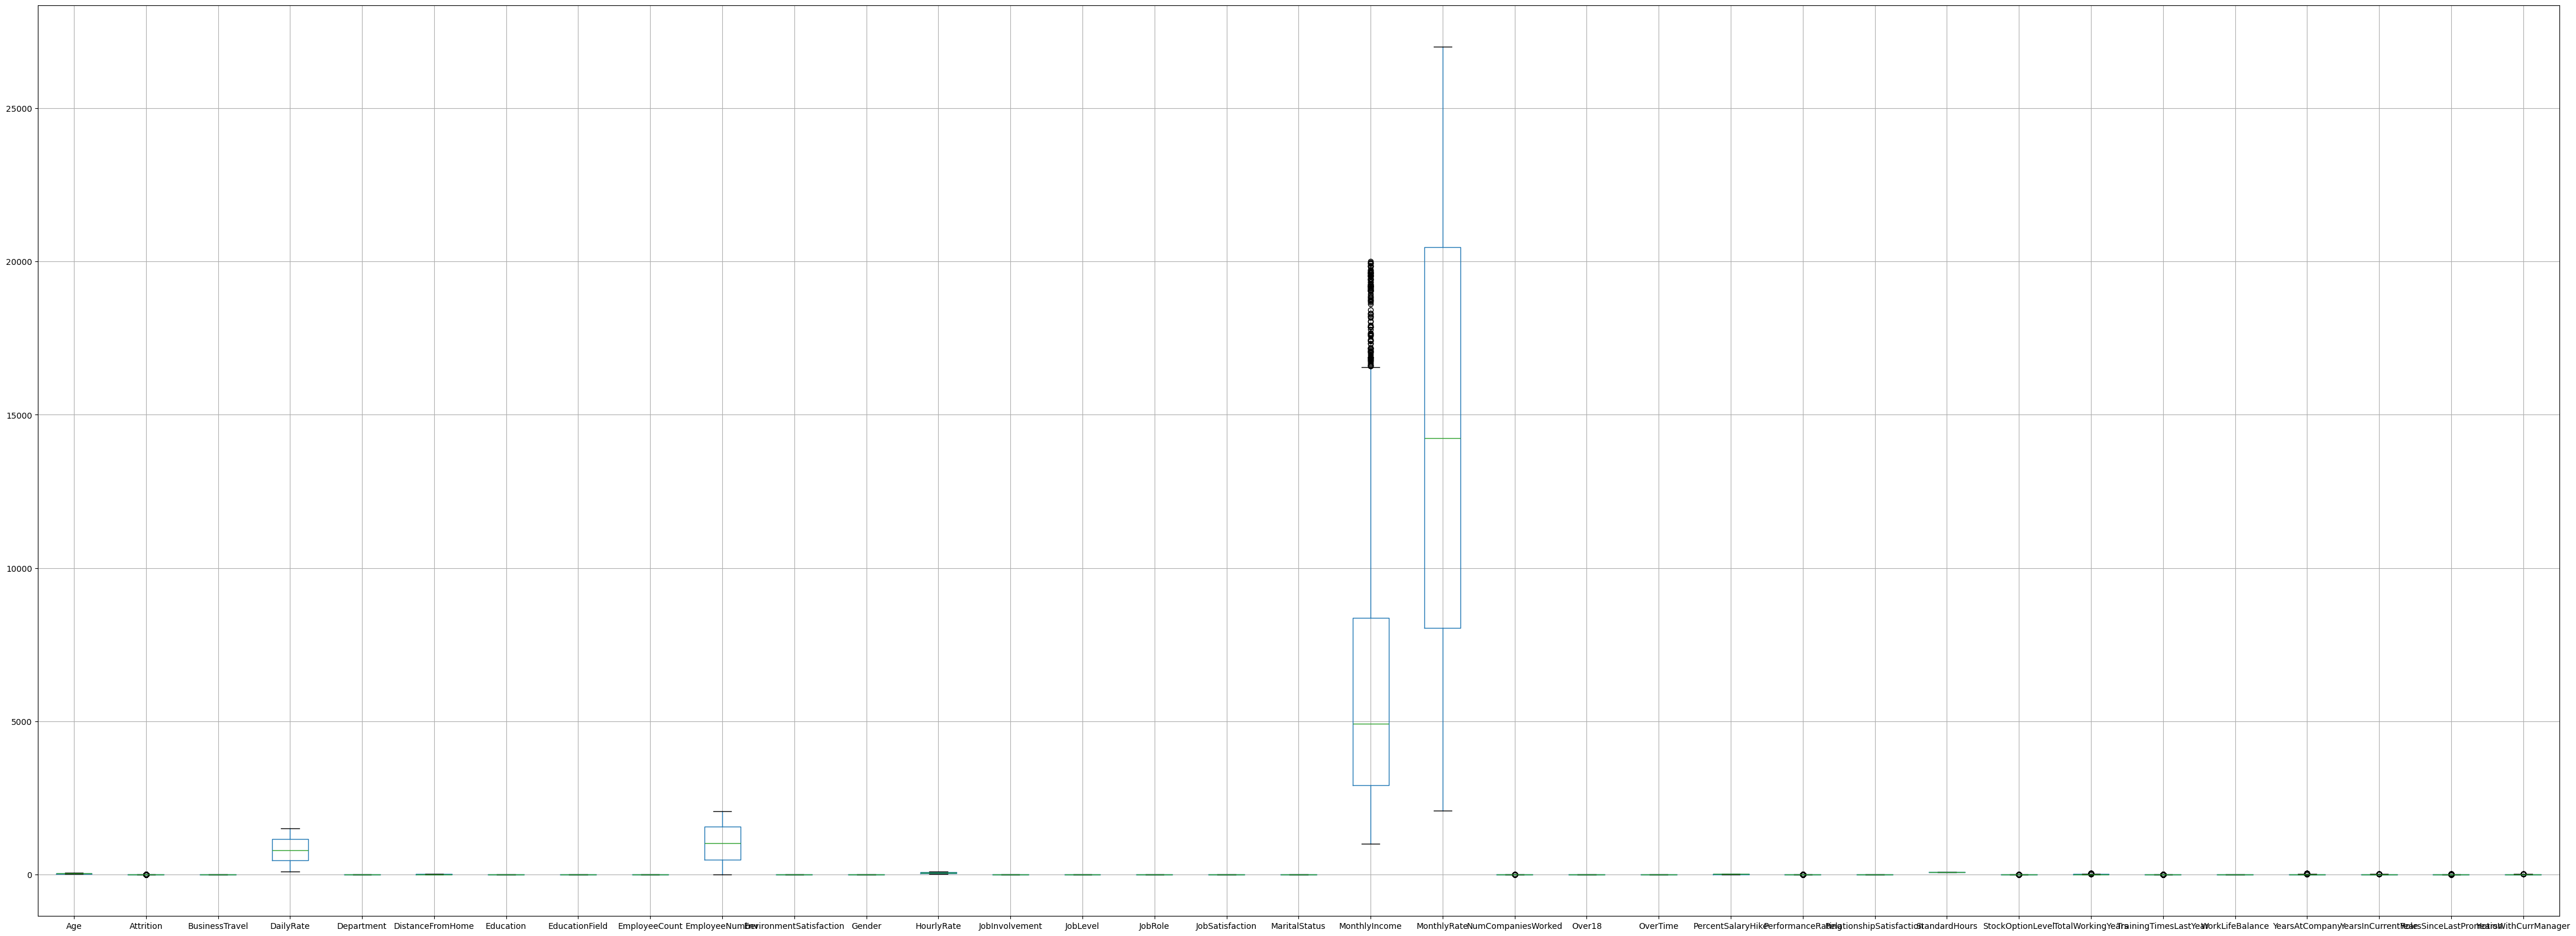

In [28]:
df.boxplot(figsize=(55,20))

### Finding relation between columns using heatmap

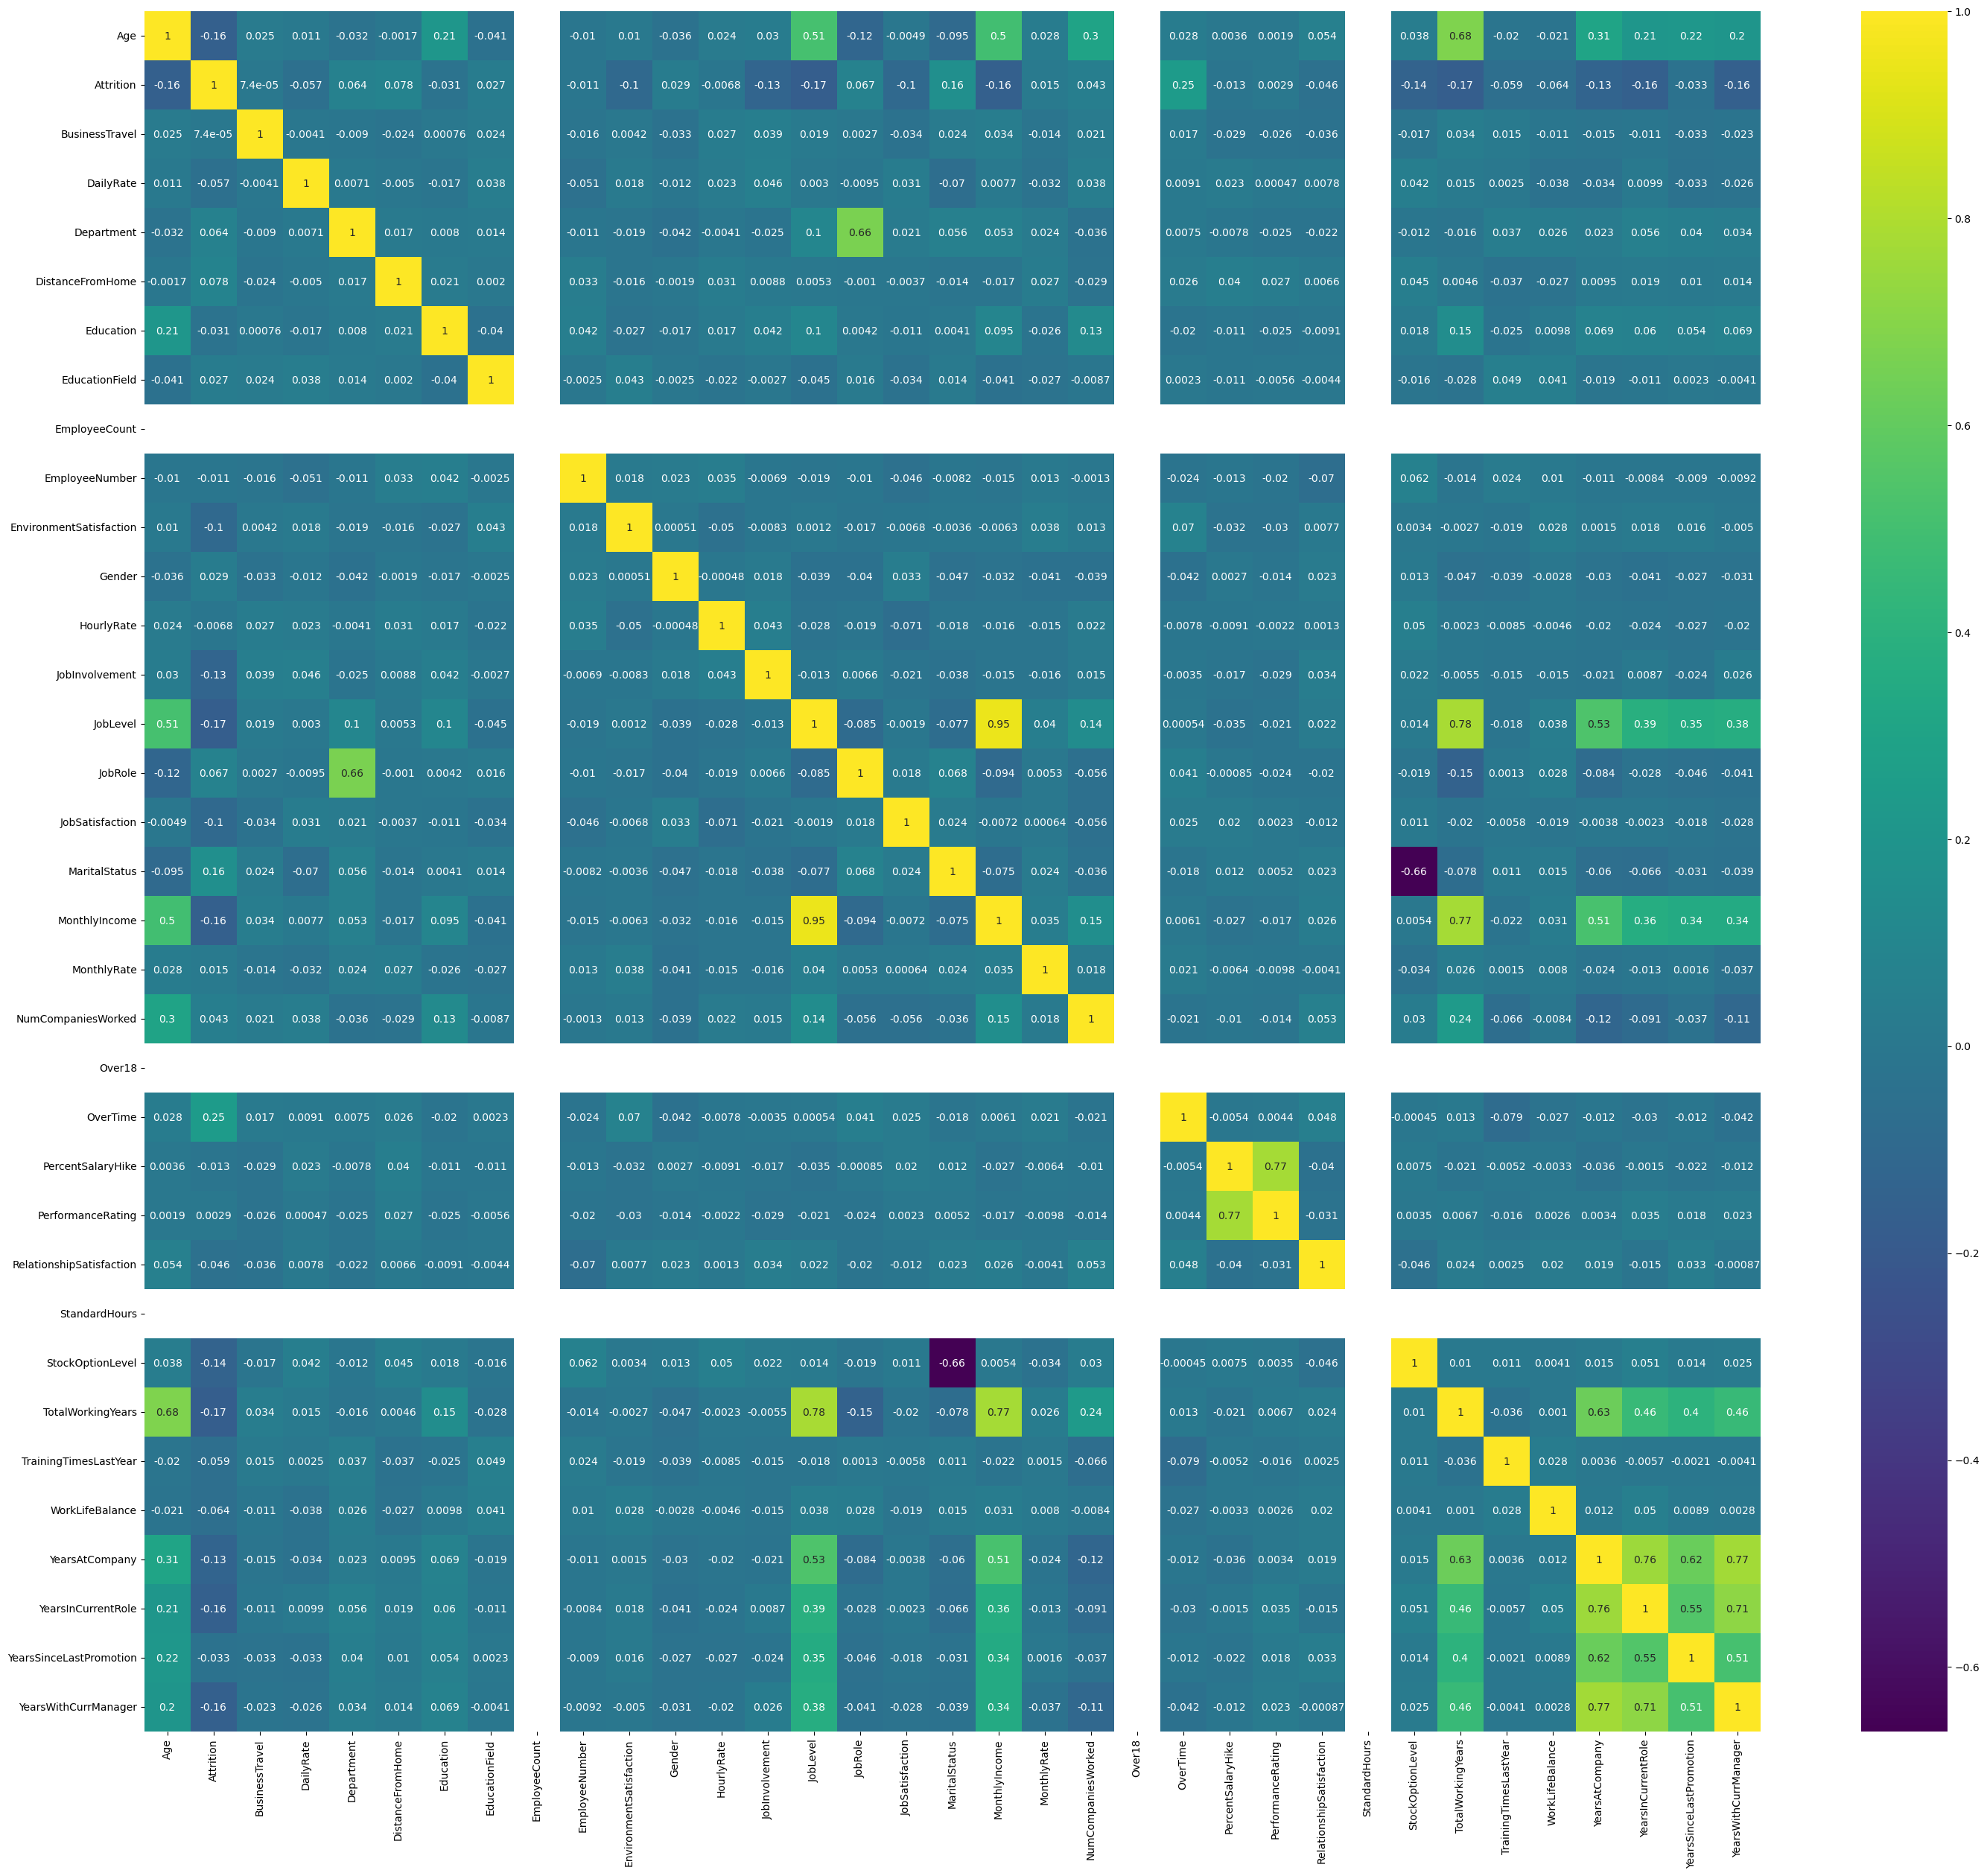

In [30]:
# Finding co-relation
co_relation = df.corr()

plt.figure(figsize=(35,30))
sns.heatmap(co_relation,cmap='viridis',annot=True)
plt.show()

In [31]:
df.drop(['EmployeeCount','OverTime','StandardHours'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.590048,1102,1.401512,1,2,-0.937414,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,-0.913194,279,-0.493817,8,1,-0.937414,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0.590048,1373,-0.493817,2,2,1.316673,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,-0.913194,1392,-0.493817,3,4,-0.937414,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0.590048,591,-0.493817,2,1,0.565311,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,-0.913194,884,-0.493817,23,2,0.565311,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,0.590048,613,-0.493817,6,1,0.565311,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,0.590048,155,-0.493817,4,3,-0.937414,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,-0.913194,1023,1.401512,2,3,0.565311,2065,4,...,3,4,0,17,3,2,9,6,0,8


# Model Development :-

### Selecting features for model development

In [34]:
# features selction 

x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Here we selecting Logistic Regression as our target vraible is binary and our outcome is having outcome as 0 and 1
### Logistic Regression :- It is a statistical method used for binary classification problem where outcome is in two possible values

In [36]:
# model

mod = LogisticRegression()
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
print("Prediction:",y_pred)

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Evaluating model :- 

### Evaluating model using various techniques :-

In [39]:
# Evaluating

acc = accuracy_score(y_pred,y_test)
print('Accuracy score of model:',acc)
mae = mean_absolute_error(y_pred,y_test)
print('Mean absolute score of model:',mae)
mse = mean_squared_error(y_pred,y_test)
print('Mean squared error of model:',mse)
recall = recall_score(y_pred,y_test)
print('Recall score of model:',recall)
f1 = f1_score(y_pred,y_test)
print('f1 score of model:',f1)
precision = precision_score(y_pred,y_test)
print('Precision score of model:',precision)
matrix = confusion_matrix(y_pred,y_test)
print('Confusion matrix of model:\n',matrix)

Accuracy score of model: 0.8673469387755102
Mean absolute score of model: 0.1326530612244898
Mean squared error of model: 0.1326530612244898
Recall score of model: 0.0
f1 score of model: 0.0
Precision score of model: 0.0
Confusion matrix of model:
 [[255  39]
 [  0   0]]
